In [20]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Step 1: Load the dataset

https://www.kaggle.com/datasets/alfathterry/bbc-full-text-document-classification
dataset link

In [9]:
file_path = 'C:/Users/rahul/Downloads/bbc_data.csv/bbc_data.csv'  # Path to the CSV file containing BBC data
bbc_data = pd.read_csv(file_path)  # Read the dataset into a pandas DataFrame

In [10]:
# Extract text and labels
X = bbc_data['data']  # Text data (articles)
y = bbc_data['labels']  # Target labels (categories)

Step 2: Explore the dataset

In [11]:
print("Shape of the dataset:")
print(f"Number of documents: {len(X)}")
print(f"Number of categories: {len(np.unique(y))}")

# Display the categories
print("\nCategories in the dataset:")
print(np.unique(y))  # Display unique category labels

# Display the first document content for better understanding
print("\nSample Document:")
print(X.iloc[0][:500])  # Show the first 500 characters of the first document

Shape of the dataset:
Number of documents: 2225
Number of categories: 5

Categories in the dataset:
['business' 'entertainment' 'politics' 'sport' 'tech']

Sample Document:
Musicians to tackle US red tape  Musicians groups are to tackle US visa regulations which are blamed for hindering British acts chances of succeeding across the Atlantic.  A singer hoping to perform in the US can expect to pay $1,300 (xc2xa3680) simply for obtaining a visa. Groups including the Musicians Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.  Nigel Mc


Step 3: Text Preprocessing

In [12]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()  # Lemmatizer to reduce words to their base form
stop_words = set(stopwords.words('english'))  # Set of English stopwords

def preprocess_text(text):
    # Lowercasing the text
    text = text.lower()
    # Tokenization, stopword removal, and lemmatization
    words = text.split()  # Split text into words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return " ".join(words)  # Join words back into a single string

# Apply preprocessing to each document
X_processed = [preprocess_text(doc) for doc in X]

Step 4: Convert text to numerical format using TF-IDF

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)  # Initialize TF-IDF Vectorizer with a max feature limit
X_tfidf = vectorizer.fit_transform(X_processed)  # Transform the documents into TF-IDF features

# Show the shape of the transformed data (rows = documents, columns = features)
print("Shape of the TF-IDF transformed data:")
print(X_tfidf.shape)


Shape of the TF-IDF transformed data:
(2225, 5000)


Step 5: Split data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)  # Stratify to maintain class distribution

Step 6: Handle Data Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

In [15]:
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)  # Resample the training data

Step 7: Model 1 - Naive Bayes Classifier

In [16]:
nb_model = MultinomialNB()  # Initialize the Multinomial Naive Bayes model
nb_model.fit(X_train_res, y_train_res)  # Train the model on resampled data

# Predictions on the test data
y_pred_nb = nb_model.predict(X_test)  # Predict labels for test data

Naive Bayes Accuracy: 0.9797752808988764

Classification Report for Naive Bayes:
                precision    recall  f1-score   support

     business       0.98      0.94      0.96       102
entertainment       0.99      0.99      0.99        77
     politics       0.97      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       0.96      0.99      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



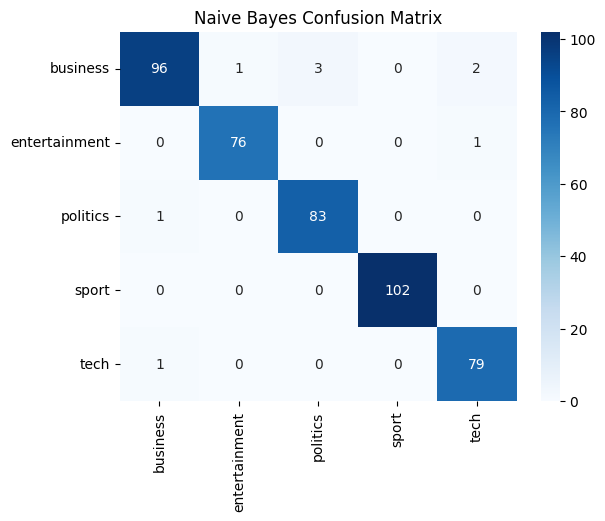

In [17]:
# Evaluate the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))  # Print accuracy score
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))  # Detailed classification report

# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=np.unique(y))  # Generate confusion matrix
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))  # Visualize confusion matrix
plt.title("Naive Bayes Confusion Matrix")  # Title for the plot
plt.show()  # Display the plot

Step 8: Model 2 - Logistic Regression Classifier

In [18]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Initialize Logistic Regression model with balanced class weights
lr_model.fit(X_train_res, y_train_res)  # Train the model on resampled data

# Predictions on the test data
y_pred_lr = lr_model.predict(X_test)  # Predict labels for test data

Logistic Regression Accuracy: 0.9797752808988764

Classification Report for Logistic Regression:
                precision    recall  f1-score   support

     business       0.98      0.96      0.97       102
entertainment       0.95      0.99      0.97        77
     politics       0.99      0.99      0.99        84
        sport       0.99      1.00      1.00       102
         tech       0.99      0.96      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



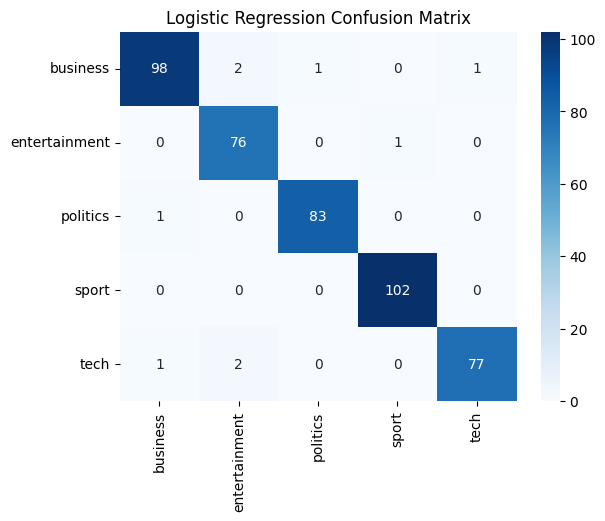

In [19]:
# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))  # Print accuracy score
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))  # Detailed classification report

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels=np.unique(y))  # Generate confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))  # Visualize confusion matrix
plt.title("Logistic Regression Confusion Matrix")  # Title for the plot
plt.show()  # Display the plot

In [4]:
# Unseen sample data
unseen_data = [
    "The stock market showed a significant rise in prices today due to strong quarterly earnings.",
    "The latest Hollywood blockbuster has broken all box office records this weekend.",
    "Scientists have made a breakthrough in quantum computing, making it more accessible."
]

# Preprocess the unseen data
unseen_data_processed = [preprocess_text(doc) for doc in unseen_data]

# Convert unseen data to TF-IDF features
unseen_data_tfidf = vectorizer.transform(unseen_data_processed)

# Predictions using Naive Bayes
nb_predictions = nb_model.predict(unseen_data_tfidf)
print("\nNaive Bayes Predictions for Unseen Data:")
for i, pred in enumerate(nb_predictions):
    print(f"Document {i+1}: {pred}")

# Predictions using Logistic Regression
lr_predictions = lr_model.predict(unseen_data_tfidf)
print("\nLogistic Regression Predictions for Unseen Data:")
for i, pred in enumerate(lr_predictions):
    print(f"Document {i+1}: {pred}")



Naive Bayes Predictions for Unseen Data:
Document 1: business
Document 2: entertainment
Document 3: tech

Logistic Regression Predictions for Unseen Data:
Document 1: business
Document 2: entertainment
Document 3: sport


Save the Models and Vectorizer

In [21]:
# Save the Naive Bayes model, Logistic Regression model, and TF-IDF vectorizer
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']